#Attacking various models with 4 different methods.

In [ ]:
#normal input stuff
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import cv2

import matplotlib.pyplot as plt
import torch.optim as optim
!pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()

from fastai.vision.widgets import *
from fastai.vision import *
from google.colab.patches import cv2_imshow
from matplotlib import colors

import numpy as np
#import cv2 as cv
import PIL
from io import StringIO, BytesIO

Mounted at /content/gdrive


##Standard 6 lines to create RESNET

In [ ]:
path = untar_data(URLs.MNIST) 

In [ ]:
data = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128)])

In [ ]:
dls = data.dataloaders(path)

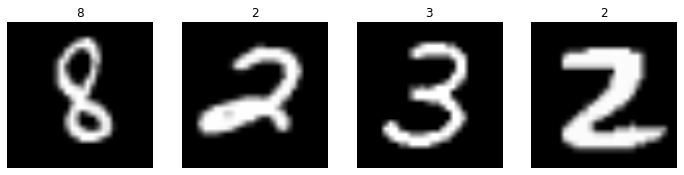

In [ ]:
#show a sample of our data
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
#fetch models
res18 = cnn_learner(dls, resnet18, metrics=[accuracy])
res34 = cnn_learner(dls, resnet34, metrics=[accuracy])
res50 = cnn_learner(dls, resnet50, metrics=[accuracy])
res101 = cnn_learner(dls, resnet101, metrics=[accuracy])
res152 = cnn_learner(dls, resnet152, metrics=[accuracy])
squeeze0 = cnn_learner(dls, squeezenet1_0, metrics=[accuracy])
squeeze1 = cnn_learner(dls, squeezenet1_1, metrics=[accuracy])
dense121 = cnn_learner(dls, densenet121, metrics=[accuracy])
dense169 = cnn_learner(dls, densenet169, metrics=[accuracy])
dense201 = cnn_learner(dls, densenet201, metrics=[accuracy])
dense161 = cnn_learner(dls, densenet161, metrics=[accuracy])
vgg16 = cnn_learner(dls, vgg16_bn, metrics=[accuracy])
vgg19 = cnn_learner(dls, vgg19_bn, metrics=[accuracy])
alex = cnn_learner(dls, alexnet, metrics=[accuracy])



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


  0%|          | 0.00/4.73M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
#put the models in a list for ease of use later
models = [res18,res34,res50,res101,res152,squeeze0,squeeze1,dense121,dense169,dense201,dense161,vgg16,vgg19,alex]
#resnets = [res34,res50,res101,res152]
resnets = models

In [ ]:
#model names in a list again for ease of use later
model_names = ["resnet18", "resnet34", "resnet50", "resnet101", "resnet152", "squeezenet1_0", "squeezenet1_1", "densenet121", "densenet169", "densenet201", "densenet161", "vgg16_bn", "vgg19_bn", "alexnet"]
#resnet_names = ["resnet34", "resnet50", "resnet101", "resnet152"]
resnet_names = model_names

In [ ]:
#train each netowrk once and print the name of the model that is training
c = 0
for r in resnets:
  print(resnet_names[c])
  c = c+1
  r.fine_tune(0)

resnet18


resnet34


resnet50


resnet101


resnet152


squeezenet1_0


squeezenet1_1


densenet121


densenet169


densenet201


densenet161


vgg16_bn


vgg19_bn


alexnet


##now we get to the fun stuff

###functions that must be initialized

In [ ]:
#get a list of random target pixels
#for a given image of X by Y return a list of random tuples of (x,y)
def getTargets(numTargets, xSize, ySize):
  targetList = []
  for i in range(numTargets):
    xrand = random.SystemRandom().randint(0,xSize)
    yrand = random.SystemRandom().randint(0,ySize)
    targetList.append([xrand,yrand])
  targetTuple = tuple(targetList)
  return targetTuple

In [ ]:
#get random files, but num_files of them for each directory
def getSpecificRandomFiles(num_files):
  
    testpath = path/'testing'
    for i in range(10):
      for j in range(num_files):
        random_dir = i
        s = str(random_dir)
        testpath2 = testpath/s 
        choice = random.choice(os.listdir(testpath2))
        actualdir = testpath2/choice
        f_arr.append(actualdir)
    return f_arr

In [ ]:
#return returns an array of files of size num_files
#randomly pick a directory then randomly pick a file in that directory
def getRandomFiles(num_files):
    testpath = path/'testing'
    for i in range(num_files):
      random_dir = random.SystemRandom().randint(0,9)
      s = str(random_dir)
      testpath2 = testpath/s 
      choice = random.choice(os.listdir(testpath2))
      actualdir = testpath2/choice
      f_arr.append(actualdir)
    return f_arr

In [ ]:
#preprocess the image. Used as a function call instead of doing this same thing each time we need to use it. 
def processImage(image):

    image = cv2.imread(image) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray
  

##hook class

The hook and Hookbkwd classes are used for the heatmap attack. 
get the weights of a layer and use these in our heatmap attack

In [ ]:
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)   
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()


In [ ]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)   
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

##big functions

In [ ]:
#"convolve" the image with a filter of a given value
#basically can an image recognizer recognize the same image that has been changed with a filter
#in this case we use the value of e for everything to cause the entire thing to darken significantly. 
def convolve2D(image, padding=0, strides=1,epsilon=1,sign_grad_data=1):
  #original image, dont modify anything
    #if(epsilon ==0 or sign_grad_data == 0):
    #  e = 1
    #else:
    
    e = sign_grad_data*epsilon
    kernel = np.array([[e, e, e], [e, e, e], [e, e, e]])
  
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                      
                        output[x, y] = (kernel *eps* imagePadded[x: x + xKernShape, y: y + yKernShape]).sum() 
                        #output[x, y] = (kernel *eps* imagePadded[x: x + eps, y: y + eps]).sum()
                except:
                    break
    
    return output

In [ ]:
def sortKey(e):
  return(e[2])
#scans the image testing for a pixel failure. 
def test_Arbitrary_image(img_string_path,model):
  learn = model
  s = img_string_path
  s2 = s.split("/")
  trueDir = s2[6]
  img = processImage(s)
  loss_array = []
  count = 0
  somelist = []
  test_array = []
  loss_sum = 0
  for y in range(img.shape[1]):
    for x in range(img.shape[0]):
      somelist.append([x,y])
      t = tuple (somelist)
      somelist.clear()
      manip = manipulatePixels(t,img,maxVal=255)
      t = tuple()
      prediction = learn.predict(manip)
      if (count % 100) == 0:
        print(count)
      
      if prediction[0] == str(trueDir):
        #get a prediction value
        loss = prediction[2]
        for losses in loss:
            floated_loss = float(losses)    
            loss_sum = floated_loss + loss_sum
        loss_average = loss_sum / len(loss)
        newvalue = [x,y,loss_average]
        loss_array.append(newvalue)
        
      else:
        print(f"EARLY SINGLE COORDS SUCCESS: ({x},{y})")
        print(f"prediction: {prediction[0]} truedir {trueDir}")
        return len(loss_array), manip 
  
      count = count+1
      loss_average = 0
      loss_sum = 0

  loss_array.sort(reverse=True,key=sortKey)

  #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


  maxVal = (img.shape[0] * img.shape[1])
  correct = True
  count = 1

  while correct and count < maxVal:
    for i in range(count):
      someX = loss_array[i][1]
      someY = loss_array[i][0]
      test_array.append([someX,someY])
      
    t = tuple(test_array)
    #print(f"test array is at: {count} it contains:{test_array}")
    manip = manipulatePixels(t,img,maxVal=255)
    prediction = learn.predict(manip)
    if prediction[0] == str(trueDir):
      count+=1
      if(count % 5) == 0:
        print(f"counts failed:{count}")
    else:
      #print(f"ATTACK SUCCESSFUL coords that worked: {test_array} number used: {len(test_array)}")
      print(f"image took: {len(test_array)}")
      correct = False
      return len(test_array), manip
      break
    test_array.clear()
    t = tuple()
  return 999999 #this is bad, error
    

In [ ]:
#test a model with an arbitrary image that has been manipulated randomly. 
def test_Arbitrary_image_random_data(img_string_path, model):
  learn = model
  s = img_string_path
  s2 = s.split("/")
  trueDir = s2[6]
  img = processImage(s)
  loss_array = []
  count = 0
  somelist = []
  test_array = []
  loss_sum = 0
  random_list = []
  maxVal = (img.shape[0] * img.shape[1])
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      random_list.append([i,j])
  random.shuffle(random_list)
  correct = True
  count = 1
   #somelist.append(coord)
  #t = tuple(random_list)
  coord_list = []
  for coord in random_list:
    coord_list.append(coord)
    t = tuple(coord_list)
    #print(f"testing tuple: {t}")
    manip = manipulatePixels(t,img,maxVal=255)
    t = tuple() #reset t value
    prediction = learn.predict(manip)
    #print(f"tried: {coord} guess: {prediction[0]} actual: {trueDir}")
    if prediction[0] == str(trueDir):
      count+=1
      if(count % 5) == 0:
        print(f"counts failed:{count}")
    else:
      #print(f"ATTACK SUCCESSFUL coords that worked: {test_array} number used: {len(test_array)}")
      print(f"image took: {len(coord_list)}")
      correct = False
      return len(coord_list), manip
      break
  print("unable to manipulate image.")
  return 999999, img #this is bad, error
    #60 on non reversed

In [ ]:
#heatmap attack
def test_Arbitrary_image_cam_map(img_string_path,inorder,model):
  learn = model
  #get the correct label from the path
  s = img_string_path
  s2 = s.split("/")
  trueDir = s2[6]
  #process the image into something RESNET can deal with. 
  img = processImage(s)
  loss_array = []
  count = 0
  somelist = []
  test_array = []
  loss_sum = 0
  random_list = []
  maxVal = (img.shape[0] * img.shape[1])
  #just assume RESNET is going to get this correct, we'll prove it wrong. 
  correct = True
  count = 1
   
  coord_list = []
  random_list = getHeatmapData(img_string_path,inorder)
  for coord in random_list:
    coord_list.append(coord)
    t = tuple(coord_list)
    #print(f"testing tuple: {t}")
    manip = manipulatePixels(t,img,maxVal=255)
    t = tuple() #reset t value
    prediction = learn.predict(manip)
   # print(f"tried: {coord} guess: {prediction[0]} actual: {trueDir}")
    if prediction[0] == str(trueDir):
      count+=1
      if(count % 5) == 0:
        print(f"counts failed:{count}")
    else:
      #print(f"ATTACK SUCCESSFUL coords that worked: {test_array} number used: {len(test_array)}")
      print(f"image took: {len(coord_list)}")
      correct = False
      return len(coord_list), manip
      break
  print("unable to manipulate image.")
  return 999999, img #this is bad, error
    #60 on non reversed

In [ ]:
#heatmap attack function call 
def getHeatmapData(img_path,inorder,mod):
  learn = mod
  img = PILImage.create(img_path)
  x, = first(dls.test_dl([img]))
  with torch.no_grad(): output = learn.model.eval()(x)
  cls = 1
  with HookBwd(learn.model[0][-2]) as hookg:
      with Hook(learn.model[0][-2]) as hook:
          output = learn.model.eval()(x.cuda())
          act = hook.stored
      output[0,cls].backward()
      grad = hookg.stored
  w = grad[0].mean(dim=[0,-2], keepdim=True)
  cam_map = (w * act[0]).sum(0)
  c = cam_map.cpu().numpy()

  c2 = cam_map.detach().cpu()
  frame1 = plt.gca()
  frame1.axes.get_xaxis().set_visible(False)
  frame1.axes.get_yaxis().set_visible(False)
  #plt.imshow(  c2,extent=(0,128,128,0))
  plt.imshow(  c2,extent=(0,28,28,0))
  buffer_ = BytesIO()
  plt.savefig( buffer_, format = "png", bbox_inches = 'tight', pad_inches = 0 )
  buffer_.seek(0)

  #image = PIL.Image.open( buffer_ )
  image = Image.open(buffer_).convert('L') #cv2 Image class
  ar = np.asarray(image)

  out = [[]]
  out2 = [[]]

  resized_image = image.resize((28,28))
  ar2 = np.asarray(resized_image)
  ar2.shape
  out = np.zeros((ar2.shape[0],ar2.shape[1]))

  for y in range(ar2.shape[0]):
    for x in range(ar2.shape[1]):
      val = ar2[x,y]
      out2.append([x,y,val])
      out[x,y] = val
      #out.append([x,y,val])
  out2.pop(0)
  out2.sort(reverse=inorder, key=lambda x: x[2])
  listy = []
  for entry in out2:
    locx = entry[0]
    locy = entry[1]
    listy.append([locx,locy])
  t = tuple(listy)
  return(t)





In [ ]:
#proof of concept
#basically a variation of a convolve with fgsm attack
def herewego_inputfile(ep,num_files,file_path, model):
    learn = model
  #file_path is an array of paths
    testpath = path/'testing'
    f_arr = []
    adv_examples = []

    initial_correct = 0
    FGSM_correct = 0
    total = 0

   
  #test x files
    for i in range(num_files):

      actualdir = file_path[i]
    #for each image in test path 
   
      #get a single prediction
      singlepred = learn.predict(actualdir)
      #get a prediction value
      predval = max(singlepred[2]) #.cpu.numpy()?

      #take the sign of this value 
      signvalue = float(np.sign(predval))
      #preprocess the image (create object we need)
      s = str(actualdir)  
      splits = s.split("/")
      trueDir = splits[6]
      img = processImage(s)
      image = processImage(s)
      s2 = str(total)
      #convolve the image with standard gradient
      output = convolve2D(image,sign_grad_data=signvalue,epsilon=ep)
      #send this new image to RESNET to see if it changes its prediction. 
      fgsm_pred = learn.predict(output)

      total= total +1
      if singlepred[0] == str(trueDir):
        initial_correct= initial_correct +1

 # Check for success
      
      if fgsm_pred[0] == str(trueDir):
        FGSM_correct += 1
            # Special case for saving 0 epsilon examples
        if (ep == 0) and (len(adv_examples) < 10):
            if(output != []):
              adv_examples.append(output)
              #also create the image we are manipulating 
            #cv2.imwrite(f'files/orig/{random_dir}/{choice}', output)
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 10:
              if(output != []):
                adv_examples.append(output)
                #cv2.imwrite(f'files/fgsmd/{random_dir}/{eps}-{choice}', output)
    # Calculate final accuracy for this epsilon
    final_acc = FGSM_correct/total
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(ep, FGSM_correct, total, final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [ ]:
#targetPixels is a tuple of pixels we want to target
def manipulatePixels(targetPixels,im,maxVal = 255,RGB = False):    
    #with Image.open(filepath) as im:
        if RGB:
          maxVal = 1
        imageArray = im
        xImgShape = imageArray.shape[0]
        yImgShape = imageArray.shape[1]
        

        #print(f"shape: {imageArray.shape} x: {xImgShape} y: {yImgShape}")
        if(not RGB):
          tsize = ([xImgShape,yImgShape])
          output = np.zeros(tsize)
          for y in range(yImgShape):
              for x in range(xImgShape):
                  test = [x,y]
                  if test in targetPixels:
                    #change the value of pixel (x,y) to the max value
                      output[x, y] = maxVal
                      
                  else:
                  #testing with an all white image
                    # output[x, y] = maxVal
                  #put the value that is present into the array
                      output[x,y] = imageArray[x,y]
                    

          #im2 = Image.fromarray((output).astype(np.uint8))
          #im2.show()
          return output

          #RGB not validated, results may vary. 
        else:
          maxVal=1 #becaues RGB is a float where 1 is full color
          tsize = ([xImgShape,yImgShape,3])
          output = np.zeros(tsize)
          for y in range(yImgShape):
              for x in range(xImgShape):
                  test = [x,y]
                  if test in targetPixels:
                      #output[x, y] = maxVal
                      output[x, y, 0] = maxVal
                      output[x, y, 1] = maxVal
                      output[x, y, 2] = maxVal
                  else:
                  #testing with an all white image
                    # output[x, y] = maxVal
                  #put the value that is present into the array
                      #output[x,y] = imageArray[x,y]
                      output[x, y,0] = imageArray[x,y,0]
                      output[x, y,1] = imageArray[x,y,1]
                      output[x, y,2] = imageArray[x,y,2]

          #im2 = Image.fromarray((output).astype(np.uint8))
          #im2.show()
          return output

##It looks like magic

In [ ]:
#works because of a floating point rounding error. so it takes a long time to do this randomly. just use run_random_attack, its better. 
def run_average_prediction(files_arr):
  counter = 0
  img_arr = []
  count_arr = []
  APPM_graph_data = []
  for f in files_arr:
    s = str(f)
    s2 = s.split("/")
    trueDir = s2[6]
    print(f"testing file {counter+1} of {len(files_arr)} ")
    c,maniped_image = test_Arbitrary_image(s)
    count_arr.append(c)
    APPM_graph_data.append([int(trueDir),c])
    img_arr.append(maniped_image)
    counter +=1
  return count_arr, img_arr, APPM_graph_data

In [ ]:
#target random pixels on an array of files on a given model 
def run_random_attack(files_arr,model):
  counter = 0
  img_arr = []
  count_arr = []
  APPM_graph_data = []
  for f in files_arr:
    s = str(f)
    s2 = s.split("/")
    trueDir = s2[6]
    print(f"testing file {counter+1} of {len(files_arr)} ")
    c,maniped_image = test_Arbitrary_image_random_data(s,model)
    count_arr.append(c)
    APPM_graph_data.append([int(trueDir),c])
    img_arr.append(maniped_image)
    counter +=1
  return count_arr, img_arr, APPM_graph_data

In [ ]:
#runs heatmap attack on a given array of files 
def run_heatmap_attack(files_arr):
  counter = 0
  img_arr = []
  count_arr = []
  APPM_graph_data = []
  for f in files_arr:
    s = str(f)
    s2 = s.split("/")
    trueDir = s2[6]
    print(f"testing file {counter+1} of {len(files_arr)} ")
    c,maniped_image = test_Arbitrary_image_cam_map(s,True)
    count_arr.append(c)
    APPM_graph_data.append([int(trueDir),c])
    img_arr.append(maniped_image)
    counter +=1
  return count_arr, img_arr, APPM_graph_data


In [ ]:
#run all before here

###standalone FGSM test

In [ ]:
run = False
if(run):
  #default test
  num_files = 15
  #takes FOREVER becareful
  #files_arr = getSpecificRandomFiles(num_files)

  #just give me n random files
  files_arr = getRandomFiles(num_files)
  accuracies = []
  examples = []
  epsilons = [0, .1,  .25, .4, .5, .75, 1]
  #original epsilons = [0, .05, .1, .15, .2, .25, .3]

  # Run test for each epsilon
  for eps in epsilons:
      #tests 50 files by default, can change if necessary
      acc, ex = herewego_inputfile(eps,num_files,files_arr)
      
      accuracies.append(acc)
      examples.append(ex)
  plot_FGSM_examples(accuracies,examples)
  plot_FGSM_data(epsilons, accuracies)


##graphing all the things

plot all of the data gathered

In [ ]:
def plot_FGSM_examples(accuracies,examples): 
  cols = 5
  cnt = 0
  plt.figure(figsize=(8,10))
  for i in range(len(epsilons)):
      for j in range(len(examples[i])):
        
          cnt += 1
          #plt.subplot(len(epsilons),len(examples[i]),cnt)
          plt.subplot(len(epsilons),cols,cnt)
          plt.xticks([], [])
          plt.yticks([], [])
          if j == 0:
              plt.ylabel("Eps: {}".format(epsilons[i]), fontsize=14)
          ex = examples[i][j]
        # plt.title("{} -> {}".format(orig, adv))
          plt.imshow(ex, cmap="gray")
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_graph(input_graph_data, files_count,title_string,plot_color='blue',line_color='green'):
  #scatter for scanning
  title = title_string

  plot_arr = input_graph_data
  x_array = [] #should be 0-9
  y_array = [] #should be seemingly random
  for y in range(files_count):
    x_array.append(plot_arr[y][0])
    y_array.append(plot_arr[y][1])

  avg_arr = []
  avg2 = np.average(y_array)
  m = max(y_array)
  minx = min(x_array) #helps with situations with only high dir files 
  for i in range(files_count):
    avg_arr.append(avg2)  
  plt.figure(figsize=(10,10))
  ax = plt.axes()
  ax.scatter(x_array,y_array,s=50, color=plot_color)
  plt.ylabel("number of pixels")
  plt.xlabel("file test number")
  plt.yticks(np.arange(0, m, step=5))
  plt.xticks(np.arange(0, 10, step=1))
  plt.title(title)
  avg_line = ax.plot(x_array, avg_arr, linestyle=":",linewidth=3, marker = 'o', color = line_color, label=title_string)
  ax.legend(loc='best')

  counter = 0
  for value in y_array:
    if value == m:
      plt.text(x_array[counter],y_array[counter],f'  max{m}')
    else: 
      plt.text(x_array[counter],y_array[counter],f'  {value}')
    counter = counter+1
  plt.text(10,avg2,f"average {avg2}")
  plt.show()

In [ ]:
def plot_all_graphs(input_graph_data, files_count,title_string,plot_color='blue',line_color='green'):
  #scatter for scanning
  name_counter = 0
  title = "all resnet things"
  plt.figure(figsize=(10,10))
  all_data = []
  #for i in range(len(input_graph_data)):
  maxes = []
  for graph in input_graph_data:
    #for j in range(files_count):
      #all_data.append(input_graph_data[i][j])

    plot_color = get_random_color()
    plot_arr = graph
    name = title_string[name_counter]
    name_counter = name_counter+1

    x_array = [] #should be 0-9
    y_array = [] #should be seemingly random
    for y in range(files_count):
      x_array.append(plot_arr[y][0])
      y_array.append(plot_arr[y][1])
    the_max = max(y_array)
    maxes.append(the_max)
    avg_arr = []
    avg2 = np.average(y_array)
    m = max(y_array)
    minx = min(x_array) #helps with situations with only high dir files 
    for i in range(files_count):
      avg_arr.append(avg2)  
    the_actual_max = max(maxes)
    m = the_actual_max
    ax = plt.axes()
    ax.scatter(x_array,y_array,s=50, color=plot_color,label=name)
    avg_line = ax.plot(x_array, avg_arr, linestyle=":",linewidth=2, marker = 'o', color = plot_color)
    
    #ax.legend(avg_line, avg_arr ,loc='upper right' )
    
    counter = 0
    for value in y_array:
      if value == m:
        plt.text(x_array[counter],y_array[counter],f'  max{m}')
      else: 
        plt.text(x_array[counter],y_array[counter],f'  {value}')
      counter = counter+1
    plt.text(10,avg2,f"{name} average {avg2}")
  ax.legend()
  #plt.tight_layout()
  plt.ylabel("number of pixels")
  plt.xlabel("file test number")

  plt.yticks(np.arange(0, m, step=5))
  plt.xticks(np.arange(0, 10, step=1))  
  plt.title(title)
  plt.show()

In [ ]:
def plot_FGSM_data(epsilons,accuracies):
  plt.figure(figsize=(5,5)) #<-----
  plt.plot(epsilons, accuracies, "*-")
  plt.yticks(np.arange(0, 1.1, step=0.1))
  plt.xticks(np.arange(0, 1.1, step=0.1))
  plt.title("Accuracy vs Epsilon")
  plt.xlabel("Epsilon")
  plt.ylabel("Accuracy")
  plt.show()


In [ ]:
def alltogethernow(input_graph1, input_graph2, input_graph3, files_count):
  #files_count = num_files
  #APPM_graph, RANDOM_graph, HEATMAP_graph,num_files)
  plot_arr = input_graph1
  plot_arr2 = input_graph2
  plot_arr3 = input_graph3
  APPM_color = 'blue'
  HEATMAP_color = 'red'
  RANDOM_color = 'orange'
  title = f'all MNIST data APPM ({APPM_color}) RANDOM ({RANDOM_color}) HEATMAP {HEATMAP_color}'

  avg_arr = []
  avg_arr_random = []
  avg_arr_heat = []
  avg2 = round(np.average(plot_arr),3)
  random_average = round(np.average(plot_arr2),3)
  heat_average = round(np.average(plot_arr3),3)
  #find the max of the plot (whichever one has higher data)
  m1 = max(plot_arr[0])
  m2 = max(plot_arr2[0])
  m3 = max (plot_arr3[0])
  maxes = []
  maxes.append(m1)
  maxes.append(m2)
  maxes.append(m3)
  m = max(maxes)

  for i in range(files_count):
    avg_arr.append(avg2)
  for i in range(files_count):
    avg_arr_random.append(random_average)  
  for i in range(files_count):
    avg_arr_heat.append(heat_average)  

  plt.figure(figsize=(10,10))
  ax = plt.axes()
  x_array = []
  y_array = []

  for y in range(files_count):
    x_array.append(plot_arr[y][0])
    y_array.append(plot_arr[y][1])
  ax.scatter(x_array,y_array,s=50, alpha=.75, color=APPM_color, label='APPM')
  avg_line = ax.plot(x_array, avg_arr, linestyle="loosely dashed",linewidth=3, color = APPM_color)
  
  counter = 0
  for value in plot_arr:
    if value[1] == m:
      plt.text(x_array[counter],y_array[counter],f'  max{m}')
    else: 
      plt.text(x_array[counter],y_array[counter],f'  {value[1]}')
    counter = counter+1
  x_array = []
  y_array = []

  for y in range(files_count):
    x_array.append(plot_arr2[y][0])
    y_array.append(plot_arr2[y][1])
  ax.scatter(x_array,y_array,s=50, alpha=.75, color=RANDOM_color, label="RANDOM")
  avg_line2 = ax.plot(x_array, avg_arr_random, linestyle="dashed",linewidth=3, color = RANDOM_color)
  counter = 0
  for value in plot_arr2:
    if value[1] == m:
      plt.text(x_array[counter],y_array[counter],f'  max{m}')
    else: 
      plt.text(x_array[counter],y_array[counter],f'  {value[1]}')
    counter = counter+1
  x_array = []
  y_array = []

  for y in range(files_count):
    x_array.append(plot_arr3[y][0])
    y_array.append(plot_arr3[y][1])
  ax.scatter(x_array,y_array,s=50, alpha=.75, color=HEATMAP_color, label='HEATMAP')
  
  avg_line3 = ax.plot(x_array, avg_arr_heat, linestyle="loosely dashed",linewidth=3, color = HEATMAP_color)
  counter = 0
  for value in plot_arr3:
    if value[1] == m:
      plt.text(x_array[counter],y_array[counter],f'  max{m}')
    else: 
      plt.text(x_array[counter],y_array[counter],f'  {value[1]}')
    counter = counter+1
 
  plt.ylabel("number of pixels")
  plt.xlabel("file test number")
  mi = min(x_array) 
  ma = max(x_array)
  plt.yticks(np.arange(0, m, step=20))
  plt.xticks(np.arange(min(x_array), max(x_array)+1, step=1))
  plt.title(title)
  
  ax.legend(loc='best' )

  #find the min point (only for small tests is this actually helpful)
  min1 = min(plot_arr)
  min2 = min(plot_arr2)
  min3 = min(plot_arr3)
  minarray = [min1,min2,min3]
  mina = min(minarray)
  minx = mina[0]

  plt.text(ma+.5,avg2,f"APPM average {avg2}")
  #minx = min(plot_arr2[0])
  plt.text(ma+.5,random_average,f"RANDOM average {random_average}")
  #minx = min(plot_arr3[0])
  plt.text(ma+.5,heat_average,f"HEATMAP average {heat_average}")

  plt.show()

#run all exploits and gather data

In [ ]:
def runallexploits(num_files,everything=False):

  #takes FOREVER if everything is true, so be careful 
  if(everything):
    #keep in mind that this is n *10 files, so 5 will test 50 files total.
    files_arr = getSpecificRandomFiles(num_files)
  else:
    #just give me n random files,
    files_arr = getRandomFiles(num_files)

  #number of pixels required to fail the image 
  APPM_counts = []
  RANDOM_counts = []
  HEATMAP_counts = []

  #pictures of the failed imgaes 
  APPM_imgs = []
  RANDOM_imgs = []
  HEATMAP_imgs = []

  #data used for graphing
  APPM_graph = []
  RANDOM_graph = []
  HEATMAP_graph = []

  #appm average prediction takes the longest BY FAR skipping until done with testing other functions. 
  APPM_counts, APPM_imgs, APPM_graph = run_average_prediction(files_arr)
  RANDOM_counts, RANDOM_imgs, RANDOM_graph = run_random_attack(files_arr)
  HEATMAP_counts, HEATMAP_imgs, HEATMAP_graph = run_heatmap_attack(files_arr)

  #default test
  accuracies = []
  examples = []
  epsilons = [0, .1,  .25, .4, .5, .75, 1]
  #original epsilons = [0, .05, .1, .15, .2, .25, .3]

  # Run test for each epsilon
  for eps in epsilons:
      #tests 50 files by default, can change if necessary
      acc, ex = herewego_inputfile(eps,num_files,files_arr)
      
      accuracies.append(acc)
      examples.append(ex)
  if(everything):
    nf = num_files * 10
  else:
    nf = num_files
  plot_FGSM_data(epsilons, accuracies)
  plot_graph(APPM_graph,nf,"APPM graph data",plot_color = 'blue', line_color = 'green')
  plot_graph(RANDOM_graph,nf,"RANDOM graph data", plot_color = 'orange',line_color = 'green')
  plot_graph(HEATMAP_graph,nf, "HEATMAP graph data", plot_color = 'red', line_color = 'green')
  alltogethernow( APPM_graph, RANDOM_graph, HEATMAP_graph,nf)
  #return the graphs for testing purposes and not much else. 
  return APPM_graph, RANDOM_graph, HEATMAP_graph



In [ ]:
def get_random_color():
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  return color

In [ ]:
def getModelName(model_int):
  #return model_names[model_int]
  return resnet_names[model_int]

In [ ]:
def exploit_models(num_files, models, everything=False):
  print(models)
  if(everything):
    #keep in mind that this is n *10 files, so 5 will test 50 files total.
    files_arr = getSpecificRandomFiles(num_files)
    nf = num_files * 10
  else:
    #just give me n random files,
    files_arr = getRandomFiles(num_files)
    nf = num_files
  all_graphs = []
  counter = 0
  for m in models:
    counts = []
    imgs = []
    graph = []
    
    modelName = getModelName(counter)
    print(f"testing: {modelName}")
    counts,imgs,graph = run_random_attack(files_arr,m)
    all_graphs.append(graph)
    counter = counter +1
  counter = 0 
  for g in all_graphs:
    modelName = getModelName(counter)
    color = get_random_color()
    plot_graph(g,nf,modelName,plot_color = color, line_color = color)
  return all_graphs


[<fastai.learner.Learner object at 0x7fd442277b90>, <fastai.learner.Learner object at 0x7fd442067b10>, <fastai.learner.Learner object at 0x7fd441f6dc10>, <fastai.learner.Learner object at 0x7fd441db3250>, <fastai.learner.Learner object at 0x7fd441aa1a50>, <fastai.learner.Learner object at 0x7fd441af0cd0>, <fastai.learner.Learner object at 0x7fd441970710>, <fastai.learner.Learner object at 0x7fd44172c210>, <fastai.learner.Learner object at 0x7fd4413ea410>, <fastai.learner.Learner object at 0x7fd44108bd90>, <fastai.learner.Learner object at 0x7fd440ede110>, <fastai.learner.Learner object at 0x7fd440e80b50>, <fastai.learner.Learner object at 0x7fd440b96c50>, <fastai.learner.Learner object at 0x7fd440b9a390>]
testing: resnet18
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 4 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 5 of 50 


counts failed:5


image took: 8
testing file 6 of 50 


image took: 3
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 45
testing file 8 of 50 


counts failed:5


image took: 5
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 11 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 12 of 50 


image took: 3
testing file 13 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 14 of 50 


counts failed:5


image took: 8
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 42
testing file 16 of 50 


counts failed:5


image took: 9
testing file 17 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 18 of 50 


counts failed:5


image took: 5
testing file 19 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 20 of 50 


image took: 3
testing file 21 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 22 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 25 of 50 


image took: 1
testing file 26 of 50 


counts failed:5


image took: 7
testing file 27 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 44
testing file 30 of 50 


counts failed:5


image took: 9
testing file 31 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 32 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 33 of 50 


counts failed:5


image took: 6
testing file 34 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 35 of 50 


counts failed:5


image took: 9
testing file 36 of 50 


image took: 2
testing file 37 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 39 of 50 


counts failed:5


image took: 5
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 43 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 45 of 50 


counts failed:5


image took: 7
testing file 46 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 48 of 50 


counts failed:5


image took: 9
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 34
testing file 50 of 50 


counts failed:5


counts failed:10


image took: 12
testing: resnet34
testing file 1 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 2 of 50 


counts failed:5


image took: 8
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 5 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 6 of 50 


image took: 2
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 38
testing file 8 of 50 


image took: 2
testing file 9 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 10 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 11 of 50 


counts failed:5


image took: 9
testing file 12 of 50 


counts failed:5


image took: 5
testing file 13 of 50 


image took: 1
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 16 of 50 


counts failed:5


image took: 8
testing file 17 of 50 


counts failed:5


image took: 5
testing file 18 of 50 


counts failed:5


image took: 6
testing file 19 of 50 


counts failed:5


image took: 7
testing file 20 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 22 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


counts failed:400


counts failed:405


counts failed:410


counts failed:415


counts failed:420


image took: 423
testing file 24 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 25 of 50 


image took: 4
testing file 26 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 27 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 34
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 39
testing file 30 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 31 of 50 


counts failed:5


image took: 8
testing file 32 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 33 of 50 


image took: 1
testing file 34 of 50 


counts failed:5


image took: 6
testing file 35 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 36 of 50 


counts failed:5


image took: 8
testing file 37 of 50 


image took: 4
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 56
testing file 39 of 50 


image took: 1
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 41 of 50 


counts failed:5


image took: 8
testing file 42 of 50 


counts failed:5


image took: 9
testing file 43 of 50 


counts failed:5


image took: 6
testing file 44 of 50 


image took: 4
testing file 45 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 47 of 50 


counts failed:5


image took: 6
testing file 48 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 54
testing: resnet50
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


image took: 314
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 70
testing file 3 of 50 


counts failed:5


image took: 8
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 46
testing file 5 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 6 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


image took: 125
testing file 7 of 50 


counts failed:5


image took: 9
testing file 8 of 50 


counts failed:5


image took: 5
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 10 of 50 


counts failed:5


image took: 9
testing file 11 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 12 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 13 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 45
testing file 16 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 18 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


image took: 329
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


image took: 398
testing file 20 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 21 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 22 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 24 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 25 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 26 of 50 


image took: 2
testing file 27 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 30 of 50 


counts failed:5


image took: 8
testing file 31 of 50 


counts failed:5


image took: 6
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


image took: 245
testing file 33 of 50 


image took: 1
testing file 34 of 50 


image took: 4
testing file 35 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 36 of 50 


counts failed:5


image took: 6
testing file 37 of 50 


image took: 3
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 39 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 50
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 41 of 50 


counts failed:5


image took: 5
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


image took: 204
testing file 43 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


counts failed:400


image took: 402
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 45 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 36
testing file 46 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 73
testing file 48 of 50 


counts failed:5


image took: 8
testing file 49 of 50 


counts failed:5


image took: 8
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing: resnet101
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


counts failed:400


image took: 400
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


counts failed:400


counts failed:405


counts failed:410


counts failed:415


counts failed:420


counts failed:425


counts failed:430


counts failed:435


counts failed:440


counts failed:445


counts failed:450


counts failed:455


counts failed:460


counts failed:465


counts failed:470


counts failed:475


counts failed:480


counts failed:485


counts failed:490


counts failed:495


counts failed:500


counts failed:505


counts failed:510


counts failed:515


counts failed:520


counts failed:525


counts failed:530


counts failed:535


counts failed:540


counts failed:545


counts failed:550


counts failed:555


counts failed:560


counts failed:565


counts failed:570


counts failed:575


counts failed:580


counts failed:585


counts failed:590


counts failed:595


counts failed:600


counts failed:605


counts failed:610


counts failed:615


counts failed:620


counts failed:625


counts failed:630


counts failed:635


counts failed:640


counts failed:645


counts failed:650


counts failed:655


counts failed:660


counts failed:665


counts failed:670


counts failed:675


counts failed:680


counts failed:685


counts failed:690


counts failed:695


counts failed:700


counts failed:705


counts failed:710


counts failed:715


counts failed:720


counts failed:725


counts failed:730


counts failed:735


counts failed:740


counts failed:745


counts failed:750


counts failed:755


counts failed:760


counts failed:765


counts failed:770


counts failed:775


counts failed:780


counts failed:785
unable to manipulate image.
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 38
testing file 5 of 50 


image took: 3
testing file 6 of 50 


counts failed:5


image took: 5
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 8 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 72
testing file 10 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 11 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 36
testing file 13 of 50 


image took: 4
testing file 14 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 16 of 50 


counts failed:5


image took: 9
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 18 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


counts failed:400


counts failed:405


counts failed:410


counts failed:415


counts failed:420


counts failed:425


counts failed:430


counts failed:435


counts failed:440


counts failed:445


counts failed:450


counts failed:455


counts failed:460


counts failed:465


counts failed:470


counts failed:475


counts failed:480


counts failed:485


counts failed:490


counts failed:495


counts failed:500


counts failed:505


counts failed:510


counts failed:515


counts failed:520


counts failed:525


counts failed:530


counts failed:535


counts failed:540


counts failed:545


counts failed:550


counts failed:555


counts failed:560


counts failed:565


counts failed:570


counts failed:575


counts failed:580


counts failed:585


counts failed:590


counts failed:595


counts failed:600


counts failed:605


counts failed:610


counts failed:615


counts failed:620


counts failed:625


counts failed:630


counts failed:635


counts failed:640


counts failed:645


image took: 647
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


image took: 336
testing file 20 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 41
testing file 22 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 23 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 25 of 50 


image took: 2
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 27 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


image took: 222
testing file 29 of 50 


counts failed:5


image took: 5
testing file 30 of 50 


counts failed:5


image took: 8
testing file 31 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 33 of 50 


image took: 4
testing file 34 of 50 


counts failed:5


image took: 9
testing file 35 of 50 


counts failed:5


image took: 6
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 37 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 39 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


image took: 65
testing file 43 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


counts failed:275


counts failed:280


counts failed:285


counts failed:290


counts failed:295


counts failed:300


counts failed:305


counts failed:310


counts failed:315


counts failed:320


counts failed:325


counts failed:330


counts failed:335


counts failed:340


counts failed:345


counts failed:350


counts failed:355


counts failed:360


counts failed:365


counts failed:370


counts failed:375


counts failed:380


counts failed:385


counts failed:390


counts failed:395


counts failed:400


counts failed:405


counts failed:410


counts failed:415


counts failed:420


counts failed:425


counts failed:430


counts failed:435


counts failed:440


counts failed:445


counts failed:450


counts failed:455


counts failed:460


counts failed:465


counts failed:470


counts failed:475


counts failed:480


counts failed:485


counts failed:490


counts failed:495


counts failed:500


counts failed:505


counts failed:510


counts failed:515


counts failed:520


counts failed:525


counts failed:530


counts failed:535


counts failed:540


counts failed:545


counts failed:550


counts failed:555


counts failed:560


counts failed:565


counts failed:570


counts failed:575


counts failed:580


counts failed:585


counts failed:590


counts failed:595


counts failed:600


counts failed:605


counts failed:610


counts failed:615


counts failed:620


counts failed:625


counts failed:630


counts failed:635


counts failed:640


counts failed:645


counts failed:650


counts failed:655


counts failed:660


counts failed:665


counts failed:670


counts failed:675


counts failed:680


counts failed:685


counts failed:690


counts failed:695


counts failed:700


counts failed:705


counts failed:710


counts failed:715


counts failed:720


counts failed:725


counts failed:730


counts failed:735


counts failed:740


counts failed:745


counts failed:750


counts failed:755


counts failed:760


counts failed:765


counts failed:770


counts failed:775


counts failed:780


counts failed:785
unable to manipulate image.
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 49
testing file 45 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 37
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 54
testing file 48 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 57
testing: resnet152
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 53
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 5 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 44
testing file 6 of 50 


image took: 4
testing file 7 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 8 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 10 of 50 


image took: 4
testing file 11 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 13 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 14 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 48
testing file 16 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 17 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 18 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 20 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 22 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


image took: 252
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 25 of 50 


image took: 1
testing file 26 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 27 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 31
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


counts failed:245


counts failed:250


counts failed:255


counts failed:260


counts failed:265


counts failed:270


image took: 274
testing file 30 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 31 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 33 of 50 


image took: 1
testing file 34 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 35 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 42
testing file 37 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


image took: 125
testing file 39 of 50 


counts failed:5


image took: 5
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


image took: 78
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 43 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 44 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 45 of 50 


counts failed:5


image took: 9
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 44
testing file 48 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 44
testing: squeezenet1_0
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 2 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 5 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 6 of 50 


image took: 4
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 56
testing file 8 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 37
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 11 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 41
testing file 12 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 13 of 50 


counts failed:5


image took: 8
testing file 14 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 53
testing file 16 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 18 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 20 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 21 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 22 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 33
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


image took: 125
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 25 of 50 


counts failed:5


image took: 7
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 27 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 29 of 50 


counts failed:5


image took: 5
testing file 30 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 31 of 50 


counts failed:5


image took: 9
testing file 32 of 50 


counts failed:5


image took: 8
testing file 33 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 34 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 35 of 50 


counts failed:5


image took: 7
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


image took: 82
testing file 37 of 50 


counts failed:5


image took: 7
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 73
testing file 39 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 38
testing file 40 of 50 


counts failed:5


image took: 6
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 43 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 45 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 34
testing file 48 of 50 


counts failed:5


image took: 8
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing: squeezenet1_1
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 43
testing file 2 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 71
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 5 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 6 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 7 of 50 


image took: 3
testing file 8 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 49
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 11 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 13 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


counts failed:165


counts failed:170


counts failed:175


counts failed:180


counts failed:185


counts failed:190


counts failed:195


counts failed:200


counts failed:205


counts failed:210


counts failed:215


counts failed:220


counts failed:225


counts failed:230


counts failed:235


counts failed:240


image took: 242
testing file 16 of 50 


counts failed:5


image took: 9
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


image took: 119
testing file 18 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 20 of 50 


counts failed:5


image took: 6
testing file 21 of 50 


image took: 4
testing file 22 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 23 of 50 


counts failed:5


image took: 6
testing file 24 of 50 


counts failed:5


image took: 8
testing file 25 of 50 


counts failed:5


image took: 7
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 27 of 50 


image took: 4
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 29 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 30 of 50 


counts failed:5


image took: 5
testing file 31 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 33 of 50 


image took: 1
testing file 34 of 50 


counts failed:5


image took: 9
testing file 35 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 37 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 38 of 50 


counts failed:5


image took: 9
testing file 39 of 50 


counts failed:5


image took: 6
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 59
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 49
testing file 43 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 36
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


image took: 145
testing file 45 of 50 


image took: 4
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


image took: 151
testing file 48 of 50 


image took: 3
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 47
testing file 50 of 50 


counts failed:5


image took: 7
testing: densenet121
testing file 1 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 2 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 5 of 50 


counts failed:5


image took: 9
testing file 6 of 50 


counts failed:5


image took: 5
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 47
testing file 8 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 34
testing file 11 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 13 of 50 


counts failed:5


image took: 7
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 16 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 58
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 73
testing file 18 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 19 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 20 of 50 


counts failed:5


image took: 7
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 22 of 50 


counts failed:5


image took: 9
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 41
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 42
testing file 25 of 50 


counts failed:5


image took: 9
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 27 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 28 of 50 


counts failed:5


image took: 6
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 30 of 50 


counts failed:5


image took: 6
testing file 31 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


image took: 136
testing file 32 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 33 of 50 


image took: 1
testing file 34 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 35 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 37 of 50 


counts failed:5


image took: 7
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 51
testing file 39 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 42 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 43 of 50 


image took: 4
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing file 45 of 50 


counts failed:5


image took: 9
testing file 46 of 50 


counts failed:5


image took: 7
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 33
testing file 48 of 50 


image took: 2
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


image took: 96
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 57
testing: densenet169
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 2 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 43
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


image took: 148
testing file 5 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 6 of 50 


image took: 1
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 50
testing file 8 of 50 


image took: 4
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


image took: 126
testing file 10 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 11 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 13 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 14 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 16 of 50 


counts failed:5


image took: 8
testing file 17 of 50 


image took: 2
testing file 18 of 50 


counts failed:5


image took: 8
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 20 of 50 


counts failed:5


image took: 6
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 22 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 35
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 45
testing file 25 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 27 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 34
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 30 of 50 


counts failed:5


image took: 6
testing file 31 of 50 


counts failed:5


image took: 9
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 33 of 50 


image took: 1
testing file 34 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


image took: 139
testing file 35 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 32
testing file 37 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


image took: 61
testing file 39 of 50 


counts failed:5


image took: 7
testing file 40 of 50 


image took: 3
testing file 41 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 42 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 43 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 44 of 50 


counts failed:5


image took: 7
testing file 45 of 50 


counts failed:5


image took: 9
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 47 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 48 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 55
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 48
testing: densenet201
testing file 1 of 50 


counts failed:5


image took: 6
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 3 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


image took: 162
testing file 5 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 6 of 50 


counts failed:5


image took: 5
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 48
testing file 8 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 33
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


image took: 87
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 43
testing file 11 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 55
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 13 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 27
testing file 16 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 18 of 50 


counts failed:5


image took: 6
testing file 19 of 50 


counts failed:5


image took: 8
testing file 20 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


image took: 86
testing file 22 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 25 of 50 


image took: 4
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


image took: 62
testing file 27 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 28 of 50 


counts failed:5


image took: 8
testing file 29 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 30 of 50 


counts failed:5


image took: 6
testing file 31 of 50 


counts failed:5


image took: 9
testing file 32 of 50 


counts failed:5


image took: 9
testing file 33 of 50 


image took: 2
testing file 34 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


image took: 95
testing file 35 of 50 


counts failed:5


image took: 6
testing file 36 of 50 


counts failed:5


image took: 9
testing file 37 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 39 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 40 of 50 


counts failed:5


image took: 9
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 42 of 50 


counts failed:5


image took: 9
testing file 43 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 34
testing file 45 of 50 


image took: 1
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 48
testing file 48 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 31
testing: densenet161
testing file 1 of 50 


counts failed:5


image took: 9
testing file 2 of 50 


counts failed:5


image took: 8
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


counts failed:150


counts failed:155


counts failed:160


image took: 161
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 72
testing file 5 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 47
testing file 6 of 50 


counts failed:5


counts failed:10


image took: 12
testing file 7 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 8 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 42
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 11 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 45
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 13 of 50 


image took: 3
testing file 14 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


image took: 82
testing file 16 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 31
testing file 17 of 50 


counts failed:5


image took: 6
testing file 18 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 20 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 56
testing file 21 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 22 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 23 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


image took: 67
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 59
testing file 25 of 50 


image took: 4
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 27 of 50 


counts failed:5


image took: 5
testing file 28 of 50 


counts failed:5


image took: 9
testing file 29 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 30 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 31 of 50 


counts failed:5


image took: 6
testing file 32 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 33 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 34 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 41
testing file 35 of 50 


image took: 2
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


image took: 71
testing file 37 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


image took: 116
testing file 39 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 24
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 46
testing file 41 of 50 


counts failed:5


image took: 5
testing file 42 of 50 


counts failed:5


image took: 8
testing file 43 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


image took: 64
testing file 45 of 50 


counts failed:5


image took: 7
testing file 46 of 50 


counts failed:5


image took: 7
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 48 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 43
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


image took: 106
testing file 50 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing: vgg16_bn
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


image took: 61
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


image took: 67
testing file 3 of 50 


counts failed:5


image took: 7
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 5 of 50 


counts failed:5


image took: 9
testing file 6 of 50 


image took: 1
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 8 of 50 


image took: 4
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 11 of 50 


image took: 2
testing file 12 of 50 


counts failed:5


image took: 5
testing file 13 of 50 


image took: 1
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 31
testing file 16 of 50 


counts failed:5


image took: 5
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 57
testing file 18 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 20 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 19
testing file 21 of 50 


counts failed:5


image took: 9
testing file 22 of 50 


counts failed:5


image took: 6
testing file 23 of 50 


counts failed:5


image took: 9
testing file 24 of 50 


image took: 3
testing file 25 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 26
testing file 27 of 50 


counts failed:5


image took: 7
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing file 29 of 50 


counts failed:5


image took: 9
testing file 30 of 50 


counts failed:5


image took: 7
testing file 31 of 50 


counts failed:5


image took: 6
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


image took: 56
testing file 33 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 34 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 35 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 36 of 50 


image took: 2
testing file 37 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 38 of 50 


counts failed:5


image took: 9
testing file 39 of 50 


image took: 3
testing file 40 of 50 


image took: 3
testing file 41 of 50 


image took: 3
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 43 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 33
testing file 45 of 50 


counts failed:5


image took: 6
testing file 46 of 50 


counts failed:5


image took: 7
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


counts failed:130


counts failed:135


counts failed:140


counts failed:145


image took: 145
testing file 48 of 50 


image took: 3
testing file 49 of 50 


counts failed:5


image took: 9
testing file 50 of 50 


counts failed:5


image took: 7
testing: vgg19_bn
testing file 1 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 2 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 3 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 4 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 5 of 50 


counts failed:5


image took: 7
testing file 6 of 50 


image took: 2
testing file 7 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 8 of 50 


image took: 3
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 10 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 11 of 50 


counts failed:5


image took: 6
testing file 12 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


image took: 69
testing file 13 of 50 


counts failed:5


image took: 8
testing file 14 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 15 of 50 


image took: 4
testing file 16 of 50 


counts failed:5


image took: 5
testing file 17 of 50 


image took: 2
testing file 18 of 50 


image took: 4
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 20 of 50 


counts failed:5


image took: 7
testing file 21 of 50 


counts failed:5


image took: 5
testing file 22 of 50 


counts failed:5


image took: 8
testing file 23 of 50 


counts failed:5


image took: 9
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 20
testing file 25 of 50 


image took: 3
testing file 26 of 50 


image took: 4
testing file 27 of 50 


image took: 4
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 23
testing file 29 of 50 


counts failed:5


image took: 9
testing file 30 of 50 


counts failed:5


image took: 9
testing file 31 of 50 


image took: 3
testing file 32 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 33 of 50 


image took: 1
testing file 34 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


image took: 65
testing file 35 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 36 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 37 of 50 


image took: 1
testing file 38 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 18
testing file 39 of 50 


image took: 4
testing file 40 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 36
testing file 41 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 22
testing file 42 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 43 of 50 


counts failed:5


image took: 5
testing file 44 of 50 


image took: 4
testing file 45 of 50 


image took: 2
testing file 46 of 50 


counts failed:5


counts failed:10


image took: 14
testing file 47 of 50 


counts failed:5


image took: 6
testing file 48 of 50 


image took: 4
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 16
testing file 50 of 50 


counts failed:5


image took: 9
testing: alexnet
testing file 1 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 2 of 50 


image took: 3
testing file 3 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 51
testing file 4 of 50 


counts failed:5


image took: 9
testing file 5 of 50 


counts failed:5


image took: 6
testing file 6 of 50 


image took: 2
testing file 7 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


image took: 115
testing file 8 of 50 


counts failed:5


image took: 8
testing file 9 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


image took: 21
testing file 10 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 28
testing file 11 of 50 


image took: 2
testing file 12 of 50 


image took: 1
testing file 13 of 50 


counts failed:5


image took: 5
testing file 14 of 50 


counts failed:5


image took: 8
testing file 15 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 41
testing file 16 of 50 


image took: 3
testing file 17 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


image took: 45
testing file 18 of 50 


counts failed:5


image took: 8
testing file 19 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 39
testing file 20 of 50 


counts failed:5


image took: 8
testing file 21 of 50 


counts failed:5


image took: 6
testing file 22 of 50 


counts failed:5


image took: 8
testing file 23 of 50 


counts failed:5


counts failed:10


image took: 13
testing file 24 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 41
testing file 25 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 26 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 27 of 50 


counts failed:5


image took: 5
testing file 28 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 30
testing file 29 of 50 


counts failed:5


image took: 9
testing file 30 of 50 


image took: 4
testing file 31 of 50 


counts failed:5


image took: 5
testing file 32 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 17
testing file 33 of 50 


image took: 1
testing file 34 of 50 


image took: 4
testing file 35 of 50 


counts failed:5


counts failed:10


image took: 10
testing file 36 of 50 


counts failed:5


image took: 6
testing file 37 of 50 


counts failed:5


image took: 6
testing file 38 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 39 of 50 


image took: 4
testing file 40 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 41 of 50 


counts failed:5


counts failed:10


image took: 11
testing file 42 of 50 


counts failed:5


image took: 8
testing file 43 of 50 


counts failed:5


image took: 5
testing file 44 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 25
testing file 45 of 50 


counts failed:5


image took: 9
testing file 46 of 50 


counts failed:5


counts failed:10


counts failed:15


image took: 15
testing file 47 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


image took: 31
testing file 48 of 50 


counts failed:5


image took: 6
testing file 49 of 50 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 38
testing file 50 of 50 


counts failed:5


counts failed:10


image took: 13


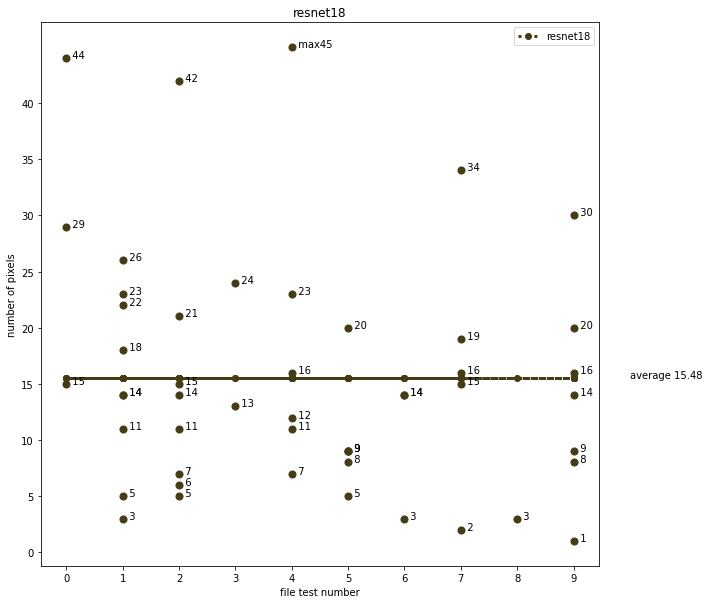

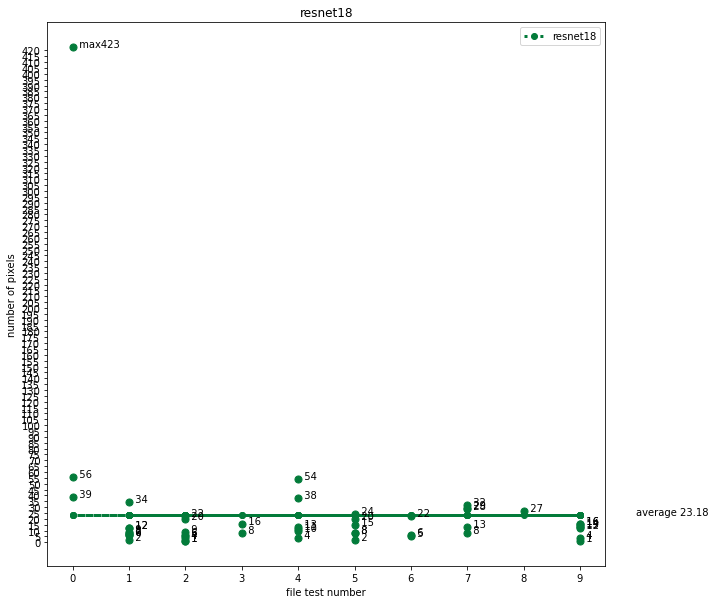

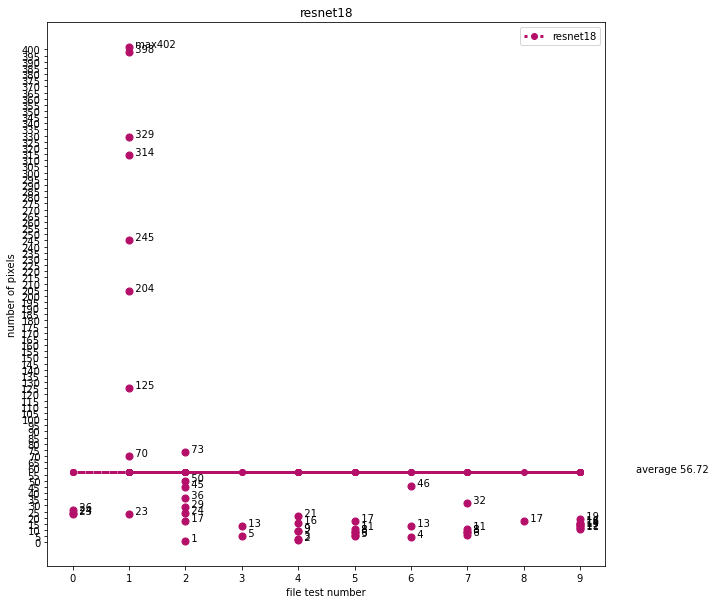

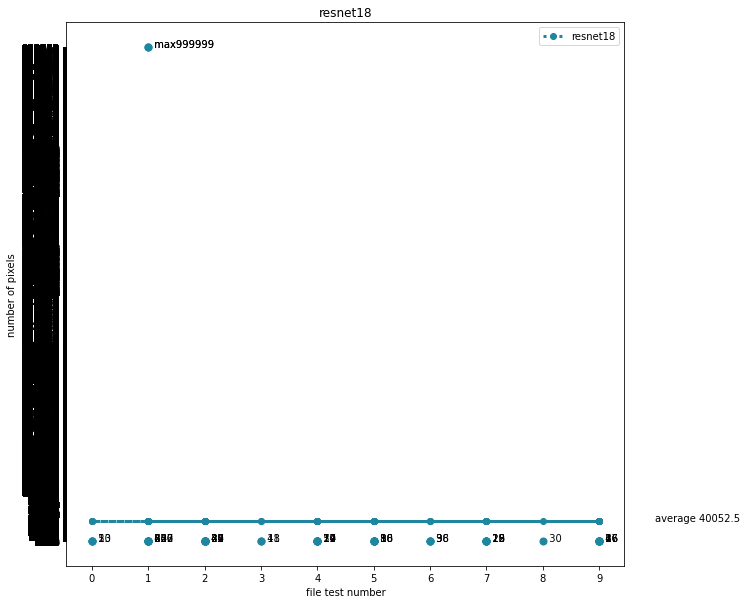

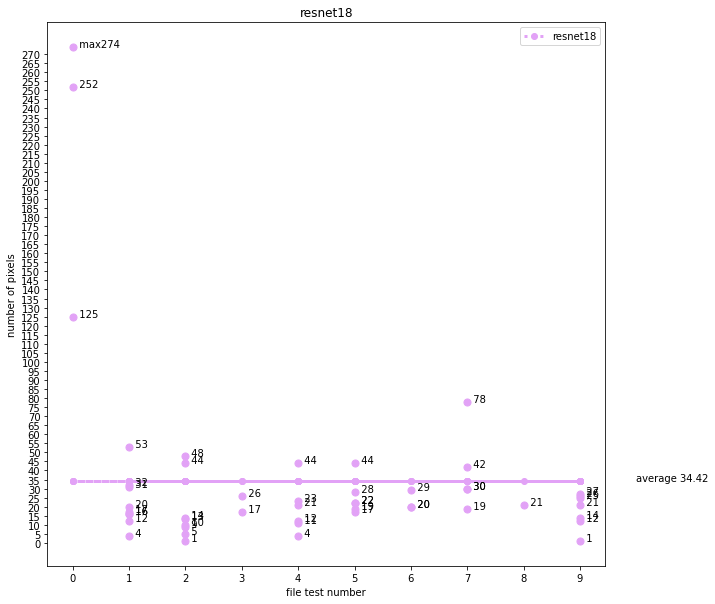

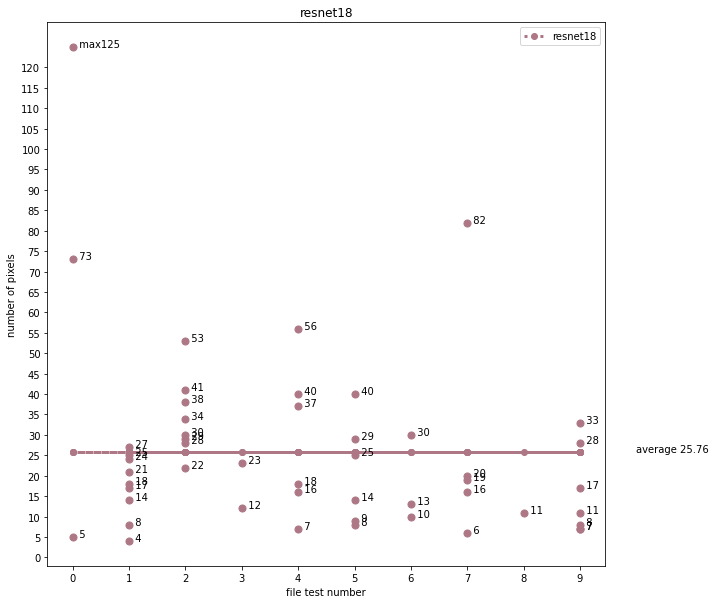

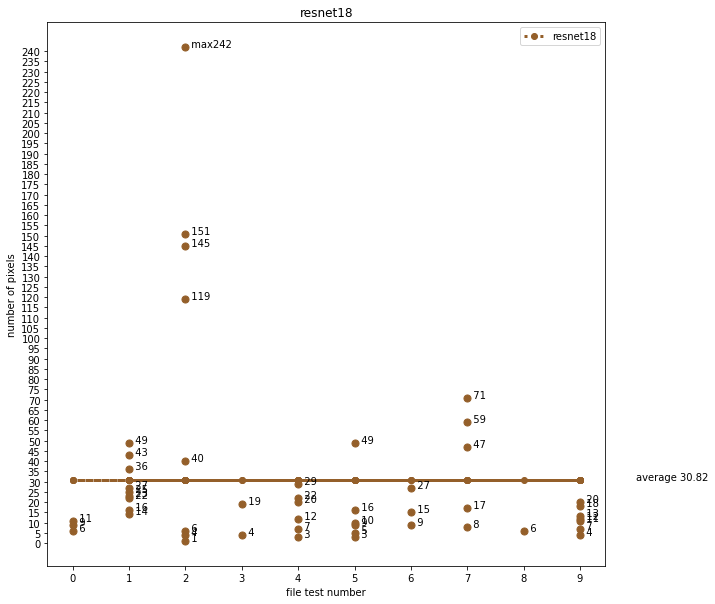

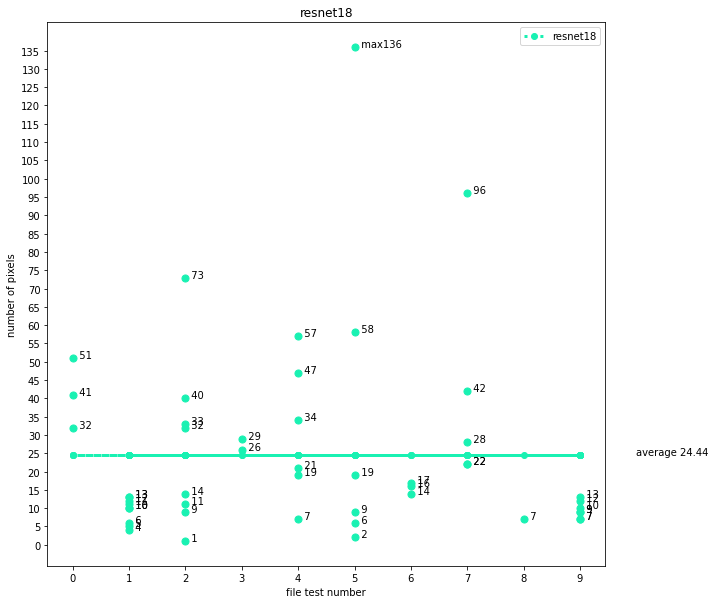

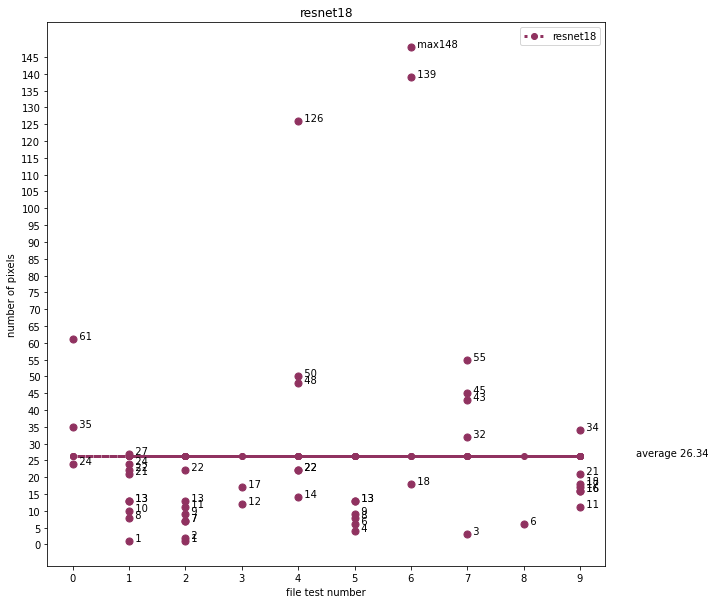

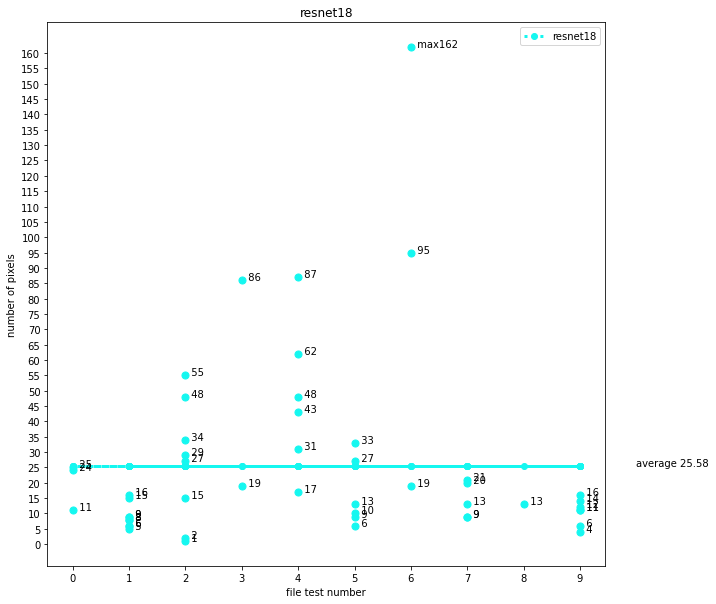

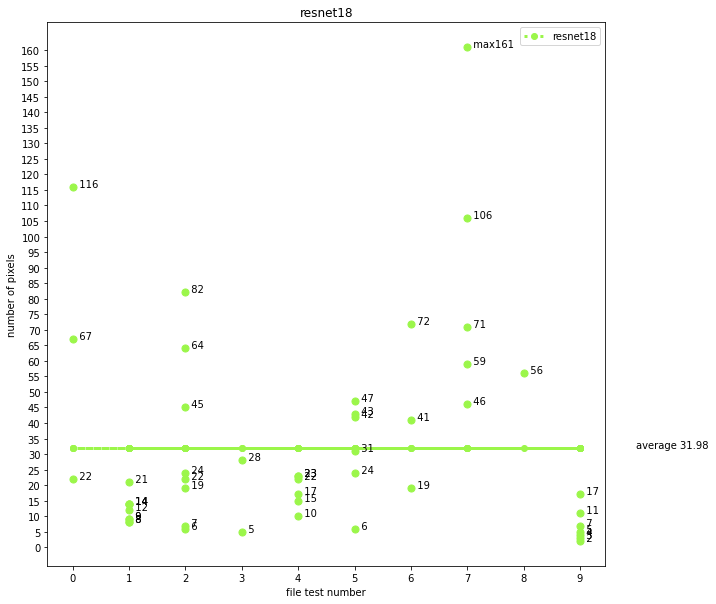

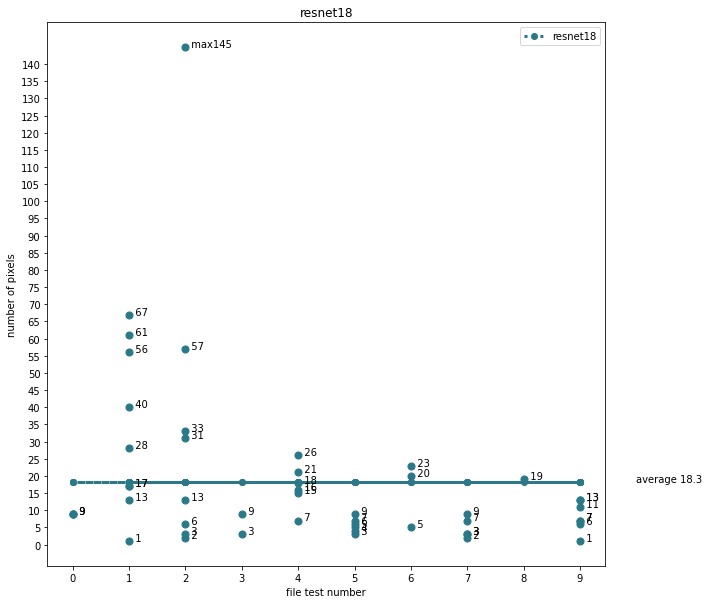

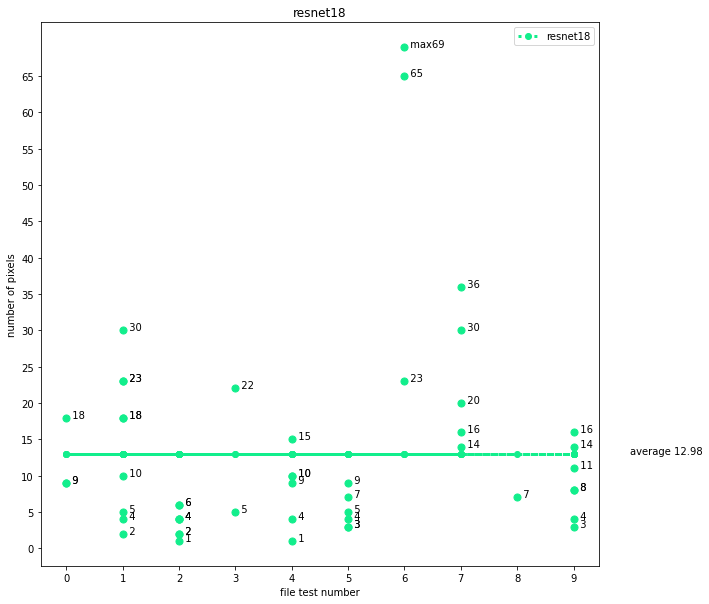

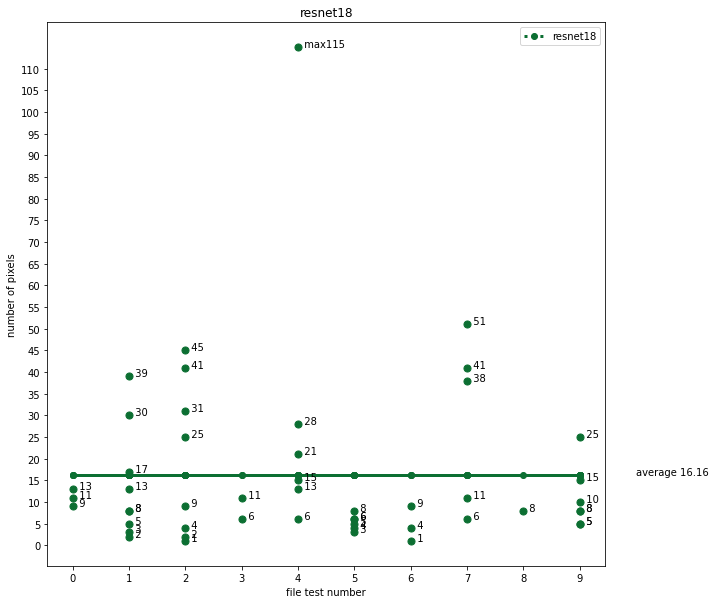

In [ ]:
files_count = 50
all_graphs = exploit_models(files_count,resnets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


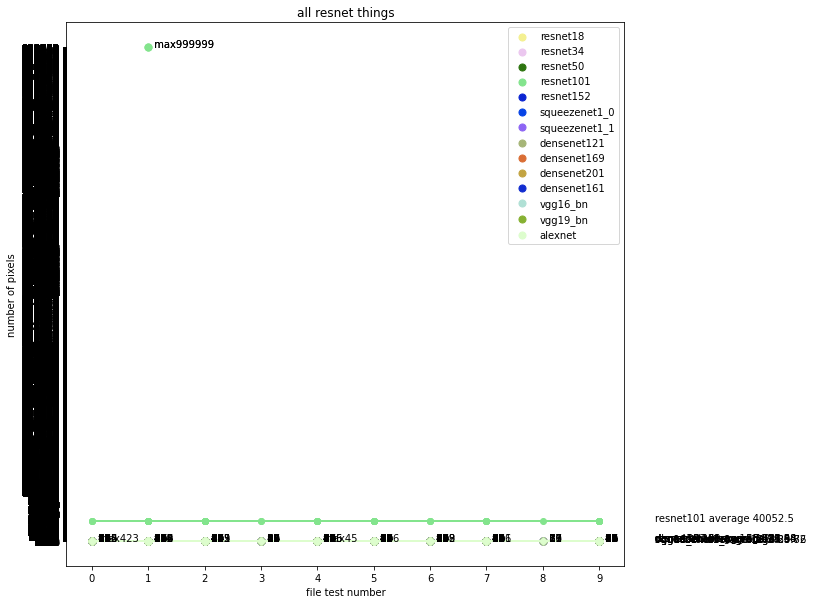

In [ ]:
plot_all_graphs(all_graphs, files_count,resnet_names)

In [ ]:
model_names[3]
n2 = []
c=0
for m in model_names:
  if c !=3:
    n2.append(m)
  c = c +1 
c = 0
g = []
for gs in all_graphs:
  if c !=3:
    g.append(gs)
  c = c +1 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


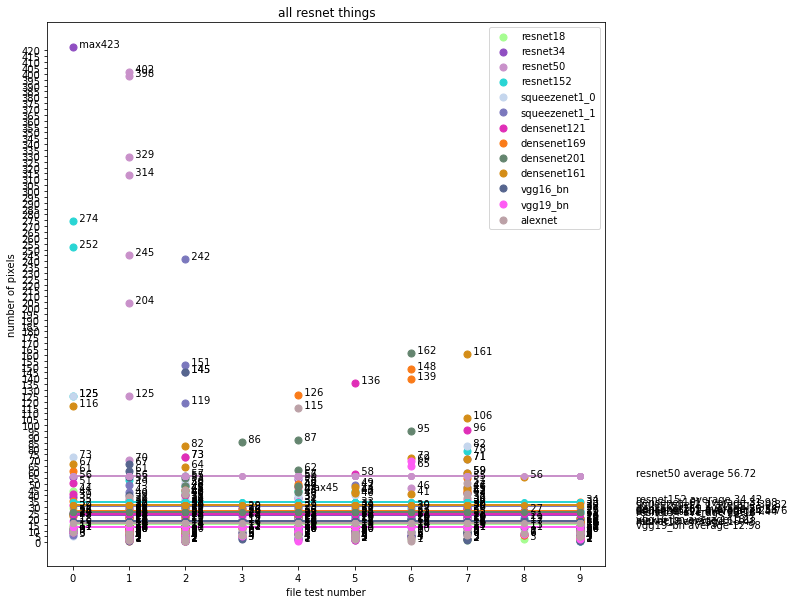

In [ ]:
plot_all_graphs(g, files_count,n2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


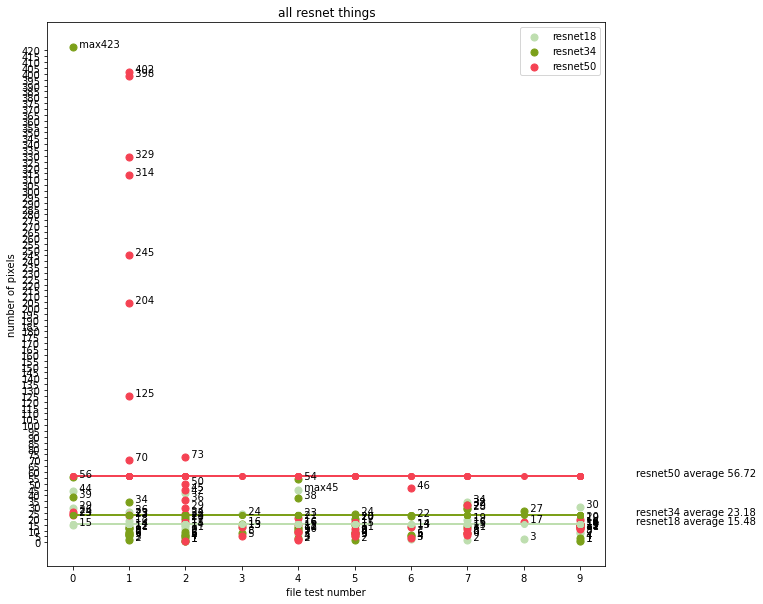

In [ ]:
plot_all_graphs(g[0:3], files_count,n2[0:3])

testing file 1 of 3 


0


100


200


300


400


500


600


700


counts failed:5


counts failed:10


image took: 14
testing file 2 of 3 


0


100


200


300


400


500


600


700


counts failed:5


counts failed:10


image took: 12
testing file 3 of 3 


0


100


200


300


400


500


600


700


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


image took: 40
testing file 1 of 3 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


image took: 29
testing file 2 of 3 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 37
testing file 3 of 3 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


image took: 54
testing file 1 of 3 


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


counts failed:70


counts failed:75


counts failed:80


counts failed:85


counts failed:90


counts failed:95


counts failed:100


counts failed:105


counts failed:110


counts failed:115


counts failed:120


counts failed:125


image took: 129
testing file 2 of 3 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


image took: 35
testing file 3 of 3 


counts failed:5


counts failed:10


counts failed:15


counts failed:20


counts failed:25


counts failed:30


counts failed:35


counts failed:40


counts failed:45


counts failed:50


counts failed:55


counts failed:60


counts failed:65


image took: 68


Epsilon: 0	Test Accuracy = 0 / 3 = 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Epsilon: 0.1	Test Accuracy = 1 / 3 = 0.3333333333333333


Epsilon: 0.25	Test Accuracy = 0 / 3 = 0.0


Epsilon: 0.4	Test Accuracy = 0 / 3 = 0.0


Epsilon: 0.5	Test Accuracy = 0 / 3 = 0.0


Epsilon: 0.75	Test Accuracy = 0 / 3 = 0.0


Epsilon: 1	Test Accuracy = 0 / 3 = 0.0


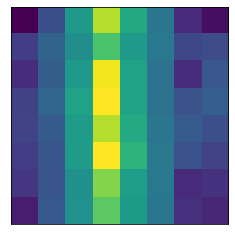

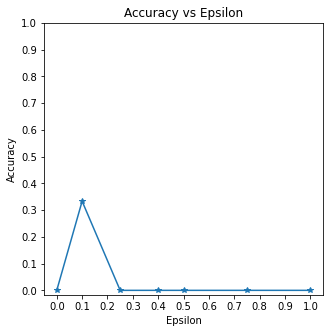

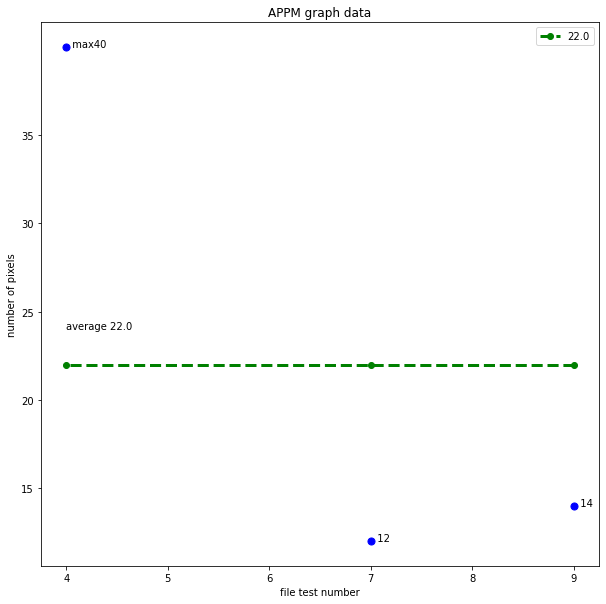

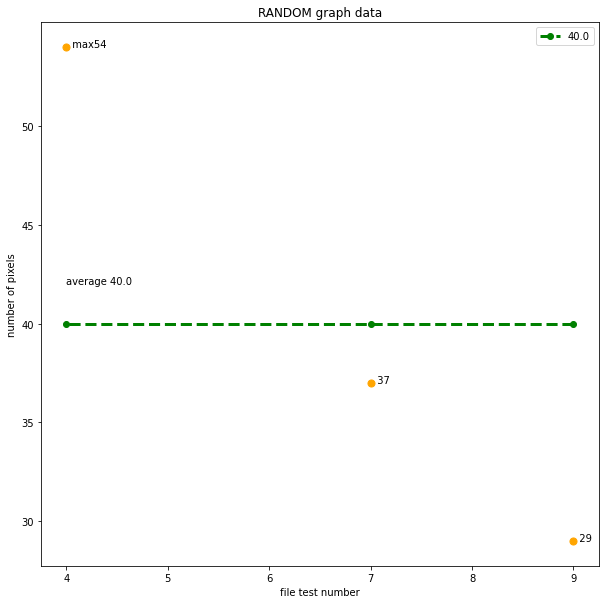

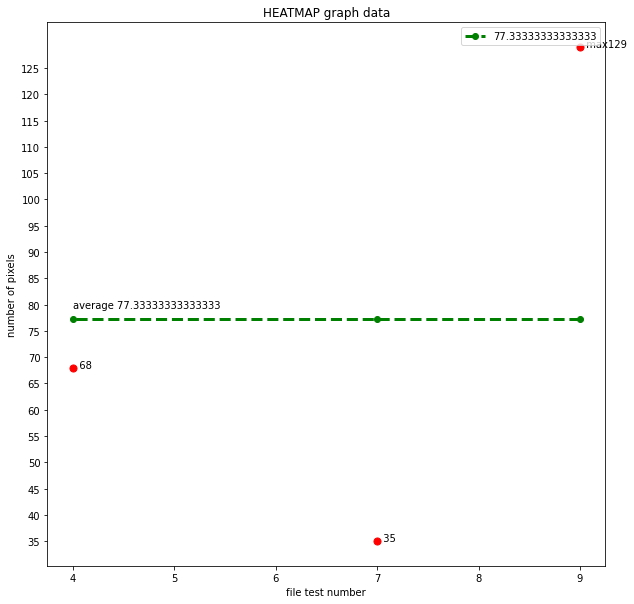

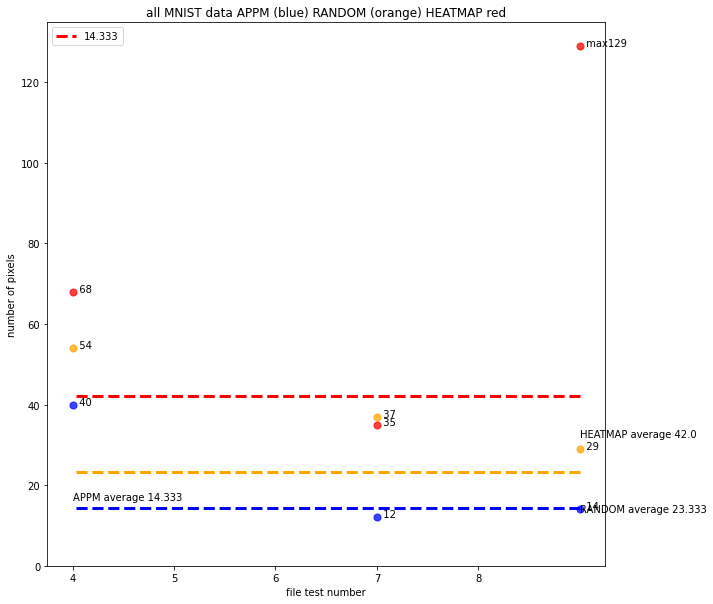

In [ ]:
#test 5 images on all models
APPM_graph, RANDOM_graph, HEATMAP_graph = runallexploits(5)

#test n*10 images on all models.
#APPM_graph, RANDOM_graph, HEATMAP_graph = runallexploits(1,everything=True)